<a href="https://colab.research.google.com/github/sonny2801/AI_CNN_LOPCHIEUT2/blob/main/nhandienmonan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.models import Sequential
from keras.layers import Convolution2D as Conv2D
from keras.layers import Flatten, MaxPooling2D
from keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import SGD
import matplotlib.pyplot as plt
from keras.layers import Activation
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
batch_size = 1
img_size = (150, 150)
img_path = '/content/drive/MyDrive/Nhandienmonan/Train_food'

In [6]:
image_generator = ImageDataGenerator(
    rescale = 1./255,
    brightness_range = (0.8, 1.2),
    zoom_range= (0.9, 1.2),
    validation_split= 0.2)

train_dataset= image_generator.flow_from_directory(img_path,
                                      target_size = img_size,
                                      batch_size = batch_size,
                                      shuffle = True,
                                      class_mode = 'categorical',
                                      subset = 'training')
validation_dataset = image_generator.flow_from_directory(img_path,
                                      target_size = img_size,
                                      batch_size = batch_size,  
                                      shuffle = True,
                                      class_mode = 'categorical',
                                      subset = 'validation')

Found 282 images belonging to 10 classes.
Found 65 images belonging to 10 classes.


In [7]:
train_dataset.classes
print(train_dataset.class_indices)

{'banh beo': 0, 'banh canh': 1, 'banh cuon': 2, 'banh mi': 3, 'bun gio': 4, 'chao ech': 5, 'com ga': 6, 'com tam': 7, 'my quang': 8, 'xoi gac': 9}


In [8]:
model = Sequential()
model.add(Conv2D(32, kernel_size = (3, 3), activation='relu', input_shape=(150,150,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())

model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())

model.add(Conv2D(128, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())

model.add(Conv2D(256, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())

model.add(Conv2D(512, kernel_size = (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 74, 74, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                        

In [9]:
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import EarlyStopping
opt = SGD(learning_rate = 0.001, momentum = 0.9)
model.compile(optimizer = opt, loss ='binary_crossentropy', metrics = ['accuracy'])

In [10]:
history = model.fit(train_dataset,batch_size=65,epochs=20,validation_data=validation_dataset)

Epoch 1/20
282/282 [==============================] - ETA: 0s - loss: 0.3698 - accuracy: 0.1738

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


282/282 [==============================] - 98s 306ms/step - loss: 0.3698 - accuracy: 0.1738 - val_loss: 0.3803 - val_accuracy: 0.1077
Epoch 2/20
282/282 [==============================] - 8s 27ms/step - loss: 0.2876 - accuracy: 0.3404 - val_loss: 0.3397 - val_accuracy: 0.1846
Epoch 3/20
282/282 [==============================] - 8s 27ms/step - loss: 0.2314 - accuracy: 0.5355 - val_loss: 0.3790 - val_accuracy: 0.2154
Epoch 4/20
282/282 [==============================] - 8s 27ms/step - loss: 0.1782 - accuracy: 0.7128 - val_loss: 0.3606 - val_accuracy: 0.1846
Epoch 5/20
282/282 [==============================] - 8s 27ms/step - loss: 0.1354 - accuracy: 0.8262 - val_loss: 0.3683 - val_accuracy: 0.2769
Epoch 6/20
282/282 [==============================] - 8s 27ms/step - loss: 0.0907 - accuracy: 0.9291 - val_loss: 0.3625 - val_accuracy: 0.3231
Epoch 7/20
282/282 [==============================] - 8s 28ms/step - loss: 0.0697 - accuracy: 0.9681 - val_loss: 0.3841 - val_accuracy: 0.3077
Epoch 8/

In [14]:
validation_dataset.labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 3,
       3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6,
       7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9],
      dtype=int32)

chao ech


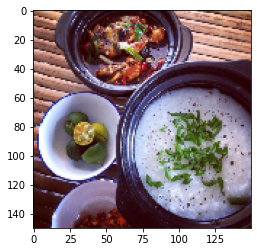

In [11]:
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
from tensorflow.keras.utils import load_img, img_to_array
import numpy as np

filename = "/content/drive/MyDrive/Nhandienmonan/Nhan dien/chaoech.jpg"

img = load_img(filename,target_size= img_size)
plt.imshow(img)
plt.show

img = img_to_array(img)
img  = img.reshape(1,*img_size,3)
img = img.astype('float32')
img = img/255
test = np.argmax(model.predict(img),axis =1)
if(test==0):
    print("banh beo ")
if(test==1):
    print("banh canh")
if(test==2):
    print("banh cuon")
if(test==3):
    print("banh mi")
if(test==4):
    print("bun gio")
if(test==5):
    print("chao ech")
if(test==6):
    print("com ga")
if(test==7):
    print("com tam")
if(test==8):
    print("my quang")
if(test==9):
    print("xoi gac") 

com tam


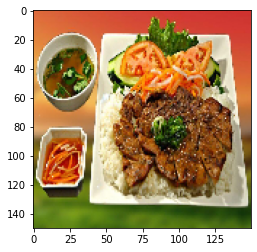

In [12]:
filename = "/content/drive/MyDrive/Nhandienmonan/Nhan dien/comtam.jpg"

img = load_img(filename,target_size= img_size)
plt.imshow(img)
plt.show

img = img_to_array(img)
img  = img.reshape(1,*img_size,3)
img = img.astype('float32')
img = img/255
test = np.argmax(model.predict(img),axis =1)
if(test==0):
    print("banh beo ")
if(test==1):
    print("banh canh")
if(test==2):
    print("banh cuon")
if(test==3):
    print("banh mi")
if(test==4):
    print("bun gio")
if(test==5):
    print("chao ech")
if(test==6):
    print("com ga")
if(test==7):
    print("com tam")
if(test==8):
    print("my quang")
if(test==9):
    print("xoi gac") 

banh beo 


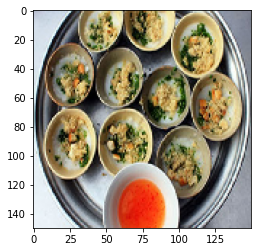

In [13]:
filename = "/content/drive/MyDrive/Nhandienmonan/Nhan dien/banhbeo.jpg"

img = load_img(filename,target_size= img_size)
plt.imshow(img)
plt.show

img = img_to_array(img)
img  = img.reshape(1,*img_size,3)
img = img.astype('float32')
img = img/255
test = np.argmax(model.predict(img),axis =1)
if(test==0):
    print("banh beo ")
if(test==1):
    print("banh canh")
if(test==2):
    print("banh cuon")
if(test==3):
    print("banh mi")
if(test==4):
    print("bun gio")
if(test==5):
    print("chao ech")
if(test==6):
    print("com ga")
if(test==7):
    print("com tam")
if(test==8):
    print("my quang")
if(test==9):
    print("xoi gac")